##### IMAGE CLASSIFICATION USING CONVOLUTIONAL NEURAL NETWORK (CNN)

#### Objective: GIVEN ANY IMAGE PREDICT THE IMAGE
##### Data can be downloaded from : 'https://www.kaggle.com/puneet6060/intel-image-classification'
### Data consists of 6 categories of images which are building, forest, glacier, mountain, sea and street


##### APPROACH:
<b> There are around 14034 images in training folder on which model will be trained on and 3000 images on testing folder to predict correctly image belongs to which categories </b>

### Importing Libraries

In [5]:
import tensorflow as tf
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator


#### CHECKING the Tensorflow version

In [2]:
tf.__version__

'2.1.0'

### Reading and displaying each categories images 

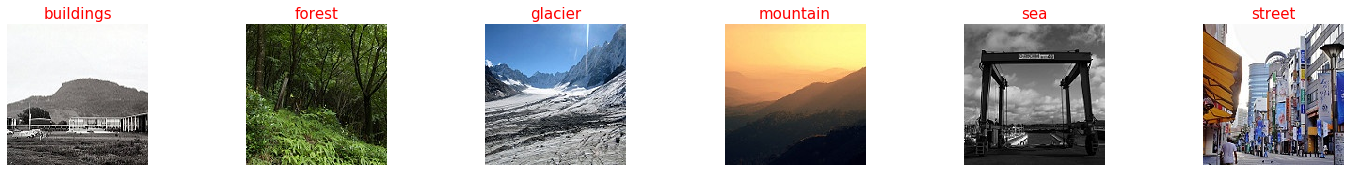

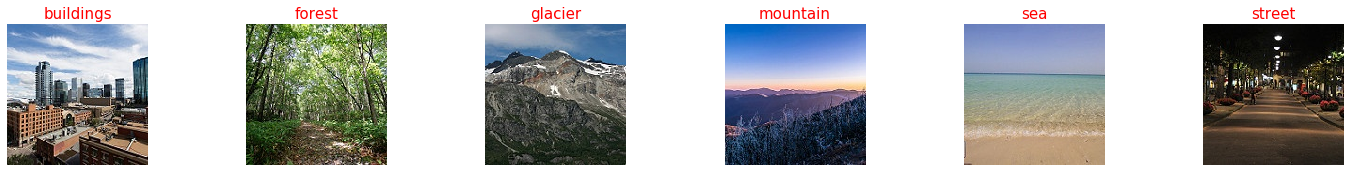

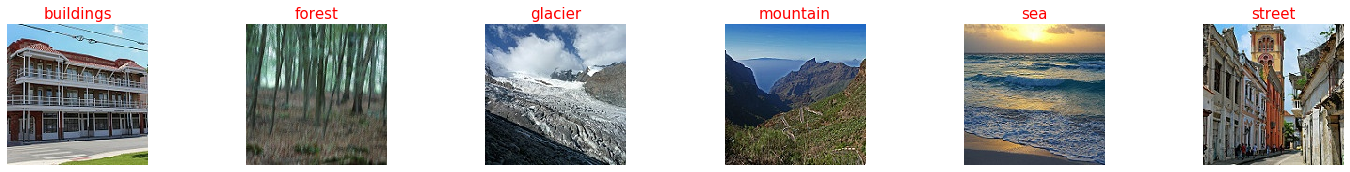

In [3]:
train_data_dir='C:/Users/shwer/OneDrive/Desktop/Image Classification/seg_train' ## path where training images are stored.
categories = ['buildings','forest','glacier','mountain','sea','street'] ## 6 categories of images.

for k in range(3):  # 3 rows 
    i=0
    plt.figure(figsize=(25,15)) # figure size 
    for category in categories:  # for every element in categories take
        plt.subplot(3, 6, i+1)  # no.of rows =3 , no.columns =6 and index position =i+1 meaning it will start from upper left position where index position is 1 and increases to right
        path=train_data_dir + '/' + category # join train_data_dir path with category 
        image_p=os.listdir(path) # it returns a list containing the names of the entries in the directory i.e. path here
        plt.title(category , color='red').set_size(15) # Setting a title of appropriate category name for each image
        plt.axis('off')
        image = cv2.imread(os.path.join(path, image_p[k])) # Join the path and 1st image of the list from image_p 
        # cv2.imread load an image from specified path location
        plt.imshow(image) # Display the image
        i+=1 # increment position of i so that index changes moves to 1 position to the right.
# 1 row in output contains every category image because we have use for loop which is for category in categories
# After displaying every category image 1st time i.e. in first row it will come out loop of inner loop which is for category in categories.
# Change the k value from 0 to 1 and again enter the inner for loop and do the same of displaying every category image and again out of the inner loop once categories are completed.
#Again change the value of k from 1 to 2 and enter inner for loop and do the same of displaying every category image and come out of inner loop once categories are completed and change the value of k but k is valid till 2 only so it will come out of the outer loop also.

##### Explanation: 1 row in output contains every category image because we have use for loop which is for category in categories
###### After displaying every category image 1st time i.e. in first row it will come out loop of inner loop which is for category in categories.
###### Change the k value from 0 to 1 and again enter the inner for loop and do the same of displaying every category image and again out of the inner loop once categories are completed.
###### Again change the value of k from 1 to 2 and enter inner for loop and do the same of displaying every category image and come out of inner loop once categories are completed and change the value of k but k is valid till 2 only so it will come out of the outer loop also.

### DATA PREPROCESSING

#### PREPROCESSING TRAINING SET

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255, # As image has value range from 0 to 255 so divide every image to get normalized value of image which is range from 0 to 1.
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True) 

training_set = train_datagen.flow_from_directory('C:/Users/shwer/OneDrive/Desktop/Image Classification/seg_train',
                                                 target_size = (150, 150), # setting the image dimension as 150 * 150 pixel size
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 14034 images belonging to 6 classes.


#### PREPROCESSING Test Set

In [7]:

test_datagen = ImageDataGenerator(rescale = 1./255) # As image has value range from 0 to 255 so divide every image to get normalized value of image which is range from 0 to 1.
test_set = test_datagen.flow_from_directory('C:/Users/shwer/OneDrive/Desktop/Image Classification/seg_test',
                                            target_size = (150, 150), # Similarly for test data image size 150 * 150 pixel size
                                            batch_size = 32,
                                            class_mode = 'categorical',shuffle=False) # mode categorical because it is multiclass labels which is it has many categories

Found 3000 images belonging to 6 classes.


In [8]:
batch_size = 32
train_num = training_set.samples # Sets value of total number of images in training folder 
validation_num = test_set.samples # Sets value of total number of images in training folder 
train_num

14034

## BUILDING CNN

Steps are:
<br>
1.Build the model</br>
<br>2.Compile the model</br>
<br>3.Train / fit the data to the model</br>
<br>4.Evaluate the model on the testing set </br>

Model consists of different layers like:
<br>1.Conv2D: (32 filters of size 3 rows by 3 columns) The features will be "extracted" from the image.</br>
<br>2.MaxPool2D: The images get half sized.</br>
<br>3.Flatten: Transforms the format of the images from a 2d-array to a 1d-array of 150 150 3 pixel values where 3 is channel(RGB) </br>
<br>4.Relu : given a value x, returns max(x, 0).</br>
<br>5.Softmax: 6 neurons, probability that the image belongs to one of the 6 categories. </br>

HERE we will be creating a CNN model that has an input layer, 2 hidden layers , 2 full connected layers and an output layer. Used convolution and max pooling in input and hidden layer.

###### Reference: https://gist.github.com/RyanAkilos/3808c17f79e77c4117de35aa68447045

In [7]:
def model(activ, end , opt, lo, ep):
    # initilization the CNN
    cnn=tf.keras.models.Sequential()
    # Adding the input layer
    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation=activ,input_shape=(150,150,3)))
    # POOLING
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    # Adding hidden layer
    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation=activ))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    # Adding 2 hidden layer
    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation=activ))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    # Flattening
    cnn.add(tf.keras.layers.Flatten())
    # 2 FULL CONNECTION
    cnn.add(tf.keras.layers.Dense(units=512, activation=activ)) # units=512 is number of nodes in layer
    cnn.add(tf.keras.layers.Dense(units=128, activation=activ)) # units=128 is number of nodes in layer
    # OUTPUT LAYER
    cnn.add(tf.keras.layers.Dense(units=6, activation=end))  # units= 6 because there are 6 categories of images
    # TRAINING CNN
    # COMPILING CNN by selecting loss function as categorical_crossentrophy, optimzer as adam and metric as accuracy
    cnn.compile(optimizer=opt,loss=lo,metrics=['accuracy'])
    # Training CNN on Train SET and EVALUATE IT ON TEST SET
    model=cnn.fit_generator(training_set, validation_data=test_set, epochs = ep, steps_per_epoch = train_num // batch_size, validation_steps = validation_num // batch_size)
    # Plotting the train vs test accuracy with respect to number of epochs
    acc=model.history['accuracy'] # training accuracy
    val_acc = model.history['val_accuracy'] # testing accuracy
    loss=model.history['loss']  # training loss
    val_loss = model.history['val_loss'] # testing loss
    epochs= range(1,len(acc)+1) # number of times it will run
# Plot Training and Testing Accuracy
    plt.title('Training and validation accuracy')
    plt.plot(epochs, acc, 'red', label='Training acc')
    plt.plot(epochs, val_acc, 'blue', label='Validation acc')
    plt.legend()
    
    plt.figure()
# Plot Training and Testing Loss 
    plt.title('Training and validation loss')
    plt.plot(epochs, loss, 'red', label='Training loss')
    plt.plot(epochs, val_loss, 'blue', label='Validation loss')
    plt.legend()

    plt.show()
    #Confusion Matrix and Classification Report
    test_set.reset() 
    Y_pred = cnn.predict_generator(test_set, verbose=True) # Predicting on unseen test data
    import numpy as np
    y_pred = np.argmax(Y_pred, axis=1)# Returns the indices of the maximum values along an axis.
    print('Confusion Matrix')
# Confusion matrix
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(test_set.classes,y_pred)
    print(cm)
    categories = ['buildings','forest','glacier','mountain','sea','street']
    df_cm = pd.DataFrame(cm)
    ax = plt.axes()
    sns.heatmap(df_cm, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=categories, 
           yticklabels=categories, ax = ax)
    ax.set_title('Confusion matrix')
    plt.show()
   

    


##### HERE we will be taking standard activation of Relu and softmax at the output layer.
##### We will be using Adam as optimzer and categorical cross entropy as loss function and epochs of 25

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 438 steps, validate for 93 steps
Epoch 1/25
438/438 [==============================] - 187s 426ms/step - loss: 0.9696 - accuracy: 0.6227 - val_loss: 0.7675 - val_accuracy: 0.7177
Epoch 2/25
438/438 [==============================] - 208s 475ms/step - loss: 0.6893 - accuracy: 0.7439 - val_loss: 0.7036 - val_accuracy: 0.7661
Epoch 3/25
438/438 [==============================] - 208s 476ms/step - loss: 0.5641 - accuracy: 0.7952 - val_loss: 0.5664 - val_accuracy: 0.7964
Epoch 4/25
438/438 [==============================] - 212s 484ms/step - loss: 0.5075 - accuracy: 0.8196 - val_loss: 0.5109 - val_accuracy: 0.8229
Epoch 5/25
438/438 [==============================] - 206s 470ms/step - loss: 0.4560 - accuracy: 0.8360 - val_loss: 0.5254 - val_accuracy: 0.8202
Epoch 6/25
438/438 [==============================] - 211s 481ms/step - loss: 0.4133 - accuracy: 0.85

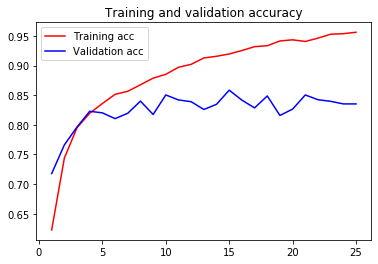

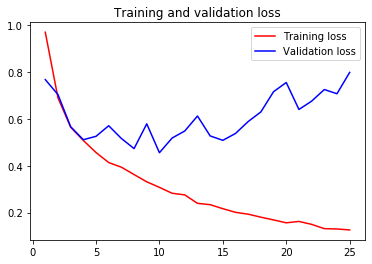

Instructions for updating:
Please use Model.predict, which supports generators.
94/94 [==============================] - 11s 120ms/step
Confusion Matrix
[[332   7   2   5  12  79]
 [  4 467   0   3   0   0]
 [ 10   5 404  75  57   2]
 [  9   6  49 419  41   1]
 [  7   7  25  13 449   9]
 [ 38  15   1   5   7 435]]


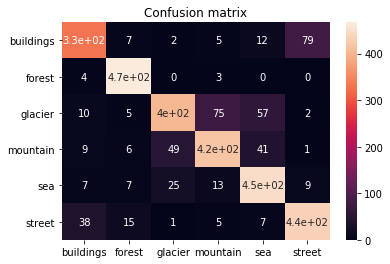

In [8]:
model1 = model('relu','softmax','adam','categorical_crossentropy',25)


### Observations:

##### <br>Model training accuracy is high while test accuracy is average but testing loss is very high compared to training loss suggesting it is not a good model.</br>
##### <br> Confusion matrix is good almost makes correct predictions for specified image but also makes some errors and misclassifies some images like 79 images of buildings it misclassifies as street </br>

##### MODEL2

In [13]:

train_datagen = ImageDataGenerator(rescale = 1./255, # As image has value range from 0 to 255 so divide every image to get normalized value of image which is range from 0 to 1.
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True) 

training_set = train_datagen.flow_from_directory('C:/Users/shwer/OneDrive/Desktop/Image Classification/seg_train',
                                                 target_size = (64, 64), # image pixel is 64 * 64
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 14034 images belonging to 6 classes.


In [14]:
test_datagen = ImageDataGenerator(rescale = 1./255) # As image has value range from 0 to 255 so divide every image to get normalized value of image which is range from 0 to 1.
test_set = test_datagen.flow_from_directory('C:/Users/shwer/OneDrive/Desktop/Image Classification/seg_test',
                                            target_size = (64, 64),  # image pixel is 64 * 64
                                            batch_size = 32,
                                            class_mode = 'categorical',shuffle=False)

Found 3000 images belonging to 6 classes.


##### Here model consists of 1 input layer, 1 hidden layer, 1 fully connected layer and 1 output layer

In [15]:
def model2(activ, end , opt, lo, ep):
    # initilization the CNN
    cnn=tf.keras.models.Sequential()
    # Adding the input layer
    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation=activ,input_shape=(64,64,3)))
    # POOLING
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    # Adding hidden layer
    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation=activ))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    # Flattening
    cnn.add(tf.keras.layers.Flatten())
    # FULL CONNECTION
    cnn.add(tf.keras.layers.Dense(units=512, activation=activ))
    # OUTPUT LAYER
    cnn.add(tf.keras.layers.Dense(units=6, activation=end))
    # TRAINING CNN
    # COMPILING CNN by selecting loss function as categorical_crossentrophy, optimzer as adam and metric as accuracy
    cnn.compile(optimizer=opt,loss=lo,metrics=['accuracy'])
    # Training CNN on Train SET and EVALUATE IT ON TEST SET
    model1=cnn.fit_generator(training_set, validation_data=test_set, epochs = ep, steps_per_epoch = train_num // batch_size, validation_steps = validation_num // batch_size)

    # Plotting the train vs test accuracy with respect to number of epochs
    acc=model1.history['accuracy']
    val_acc = model1.history['val_accuracy']
    loss=model1.history['loss']
    val_loss = model1.history['val_loss']
    epochs= range(1,len(acc)+1)
    
    plt.title('Training and validation accuracy')
    plt.plot(epochs, acc, 'red', label='Training acc')
    plt.plot(epochs, val_acc, 'blue', label='Validation acc')
    plt.legend()
    
    plt.figure()
    plt.title('Training and validation loss')
    plt.plot(epochs, loss, 'red', label='Training loss')
    plt.plot(epochs, val_loss, 'blue', label='Validation loss')
    plt.legend()

    plt.show()
    test_set.reset()
    Y_pred = cnn.predict_generator(test_set, verbose=True)
    import numpy as np
    y_pred = np.argmax(Y_pred, axis=1)
# Getting confusion matrix
    print('Confusion Matrix')
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(test_set.classes,y_pred)
    print(cm)
    categories = ['buildings','forest','glacier','mountain','sea','street']
    df_cm = pd.DataFrame(cm)
    ax = plt.axes()
    sns.heatmap(df_cm, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=categories, 
           yticklabels=categories, ax = ax)
    ax.set_title('Confusion matrix')
    plt.show()


#### Here activation function is tanh and output layer as softmax , adam as optimizer , categorical cross entropy as loss function and epoch of 10

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 438 steps, validate for 93 steps
Epoch 1/10
438/438 [==============================] - 47s 108ms/step - loss: 1.1100 - accuracy: 0.6068 - val_loss: 0.8891 - val_accuracy: 0.6751
Epoch 2/10
438/438 [==============================] - 48s 109ms/step - loss: 0.8702 - accuracy: 0.6808 - val_loss: 0.9359 - val_accuracy: 0.6663
Epoch 3/10
438/438 [==============================] - 53s 122ms/step - loss: 0.7808 - accuracy: 0.7163 - val_loss: 0.9129 - val_accuracy: 0.6811
Epoch 4/10
438/438 [==============================] - 55s 125ms/step - loss: 0.7212 - accuracy: 0.7351 - val_loss: 0.9084 - val_accuracy: 0.6804
Epoch 5/10
438/438 [==============================] - 57s 129ms/step - loss: 0.6592 - accuracy: 0.7622 - val_loss: 0.9025 - val_accuracy: 0.6885
Epoch 6/10
438/438 [==============================] - 57s 131ms/step - loss: 0.6264 - accuracy: 0.7701 - val_loss: 0.8668 - val_accuracy: 0.6999
Epoch 7/10
438/438 [=================

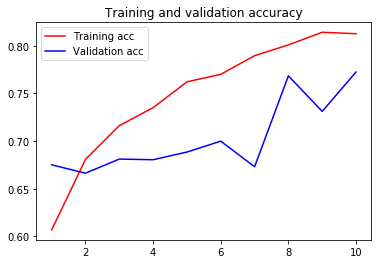

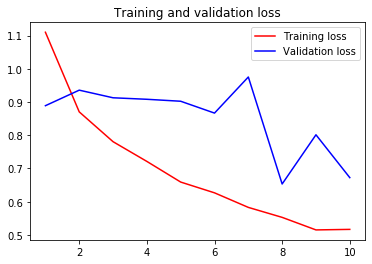

94/94 [==============================] - 4s 40ms/step
Confusion Matrix
[[376  15   3   8   5  30]
 [ 10 458   0   2   1   3]
 [ 44   6 413  57  23  10]
 [ 52   6  65 371  21  10]
 [ 53   5  60  50 338   4]
 [ 96  36   3   3   5 358]]


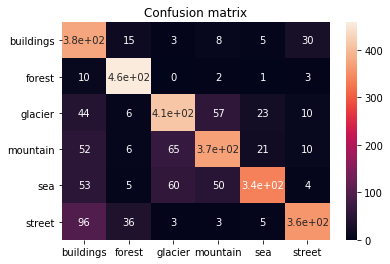

In [16]:
mod = model2('tanh','softmax','adam','categorical_crossentropy',10)

## Observations:
###### 10 epoch gives good accuracy and test data loss comapred to higher epoch set (25 in previous model)
###### Although accuracy for testing data is average slowly increasing per epoch but testing data loss is decreasing suggesting a good model.
###### Confusion matrix does fairly good job of correctly predicting images but also has some errors it misclassifies as buiuldings for some non building images.

##### MODEL 3

In [17]:
training_set = train_datagen.flow_from_directory('C:/Users/shwer/OneDrive/Desktop/Image Classification/seg_train',
                                                 target_size = (150, 150), # train image size is 150 * 150 pixel 
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 14034 images belonging to 6 classes.


In [18]:
test_datagen = ImageDataGenerator(rescale = 1./255) # As image has value range from 0 to 255 so divide every image to get normalized value of image which is range from 0 to 1.
test_set = test_datagen.flow_from_directory('C:/Users/shwer/OneDrive/Desktop/Image Classification/seg_test',
                                            target_size = (150, 150),  # test image size is 150 * 150 pixel 
                                            batch_size = 32,
                                            class_mode = 'categorical',shuffle=False)

Found 3000 images belonging to 6 classes.


#### Model consists of 1 input layer , 3 hidden layers, 2 fully connected layers and 1 output layer

In [3]:
def model3(activ, end , opt, lo, ep):
    # initilization the CNN
    cnn=tf.keras.models.Sequential()
    # Adding the input layer
    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation=activ,input_shape=(150,150,3)))
    # POOLING
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    # Adding hidden layer
    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation=activ))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    # Adding 2 hidden layer
    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation=activ))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    # Adding 3 hidden layer
    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation=activ))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    # Flattening
    cnn.add(tf.keras.layers.Flatten())
    # 2 FULL CONNECTION
    cnn.add(tf.keras.layers.Dense(units=512, activation=activ))
    cnn.add(tf.keras.layers.Dense(units=128, activation=activ))
    # OUTPUT LAYER
    cnn.add(tf.keras.layers.Dense(units=6, activation=end))
    # TRAINING CNN
    # COMPILING CNN by selecting loss function as categorical_crossentrophy, optimzer as adam and metric as accuracy
    cnn.compile(optimizer=opt,loss=lo,metrics=['accuracy'])
    # Training CNN on Train SET and EVALUATE IT ON TEST SET
    model=cnn.fit_generator(training_set, validation_data=test_set, epochs = ep, steps_per_epoch = train_num // batch_size, validation_steps = validation_num // batch_size)
    # Plotting the train vs test accuracy with respect to number of epochs
    acc=model.history['accuracy']
    val_acc = model.history['val_accuracy']
    loss=model.history['loss']
    val_loss = model.history['val_loss']
    epochs= range(1,len(acc)+1)
    
    plt.title('Training and validation accuracy')
    plt.plot(epochs, acc, 'red', label='Training acc')
    plt.plot(epochs, val_acc, 'blue', label='Validation acc')
    plt.legend()
    
    plt.figure()
    plt.title('Training and validation loss')
    plt.plot(epochs, loss, 'red', label='Training loss')
    plt.plot(epochs, val_loss, 'blue', label='Validation loss')
    plt.legend()

    plt.show()
    #Confusion Matrix and Classification Report
    test_set.reset()
    Y_pred = cnn.predict_generator(test_set, verbose=True)
    import numpy as np
    y_pred = np.argmax(Y_pred, axis=1)
    print('Confusion Matrix')
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(test_set.classes,y_pred)
    print(cm)
    categories = ['buildings','forest','glacier','mountain','sea','street']
    df_cm = pd.DataFrame(cm)
    ax = plt.axes()
    sns.heatmap(df_cm, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=categories, 
           yticklabels=categories, ax = ax)
    ax.set_title('Confusion matrix')
    plt.show()
    from keras.preprocessing import image
    test_image = image.load_img('C:/Users/shwer/OneDrive/Desktop/Image Classification/seg_pred/3.jpg', target_size = (150, 150))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = cnn.predict(test_image)
    training_set.class_indices
    if result[0][0] == 1:
        prediction = 'building'
    elif result[0][0] == 2:
        prediction = 'forest'
    elif result[0][0] == 3:
        prediction = 'glacier'
    elif  result[0][0] == 4:
        prediction = 'mountain'
    elif  result[0][0] == 5:
        prediction = 'sea'
    else:
        prediction = 'street'
    print(prediction)
   

    


#### Model takes relu as standard activation function , softmax as output layer , adam as optimzer, categorical crossentropy as loss function and epochs as 10

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 438 steps, validate for 93 steps
Epoch 1/10
438/438 [==============================] - 198s 453ms/step - loss: 1.0944 - accuracy: 0.5616 - val_loss: 0.8871 - val_accuracy: 0.6398
Epoch 2/10
438/438 [==============================] - 227s 517ms/step - loss: 0.8128 - accuracy: 0.6868 - val_loss: 0.7502 - val_accuracy: 0.7063
Epoch 3/10
438/438 [==============================] - 227s 518ms/step - loss: 0.6739 - accuracy: 0.7490 - val_loss: 0.5689 - val_accuracy: 0.7974
Epoch 4/10
438/438 [==============================] - 214s 488ms/step - loss: 0.5837 - accuracy: 0.7858 - val_loss: 0.5174 - val_accuracy: 0.8219
Epoch 5/10
438/438 [==============================] - 216s 492ms/step - loss: 0.5375 - accuracy: 0.8010 - val_loss: 0.4856 - val_accuracy: 0.8219
Epoch 6/10
438/438 [==============================] - 209s 477ms/step - loss: 0.4857 - accuracy: 0.82

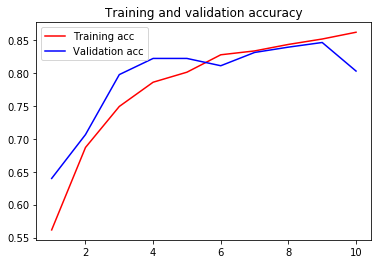

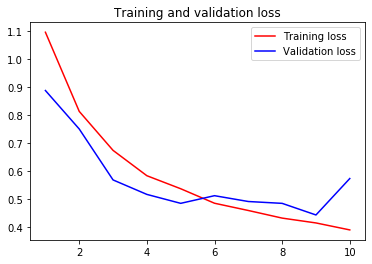

Instructions for updating:
Please use Model.predict, which supports generators.
94/94 [==============================] - 12s 125ms/step
Confusion Matrix
[[407   5   1   1   0  23]
 [  7 440   0   2   0  25]
 [ 31   8 387  73  35  19]
 [ 29   4  48 379  53  12]
 [ 63   7  18  14 395  13]
 [100   0   0   2   3 396]]


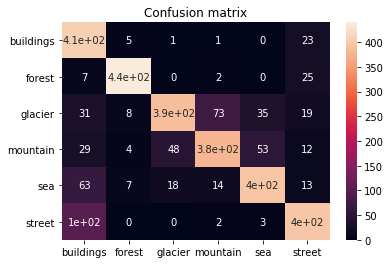

street


In [9]:
model1 = model3('relu','softmax','adam','categorical_crossentropy',10)


### Observations: 
##### This model does a good job on testing data where accuracy is also good and also testing data loss is also is low and decreasing per epoch.
###### Confusion matrix does good job correctly predicting images BUT has some problems it incorrectly classifies 124 glacier as mountain and 85 street as building may be because in street there might be a building so model has problem predicting it. 
#### Given a sample image it correctly classified image as street

## Conclusion:
<br><b> Model1 Testing Accuracy is average and also Testing data loss is high Suggesting NOT A GOOD MODEL OPTION</b></br>
<br><b> Model2 Testing Accuracy is decent and even loss on Testing data is Decreasing Suggesting GOOD MODEL OPTION</b></br>
<br><b> Model3 Testing Accuracy is good and even loss on testing data is decreasing and less than Model2 Suggesting BETTER MODEL THAN MODEL2</b></br>
<br><b> Model3 is best model among the 3 models</b></br>